In [1]:
%cd C:\Users\yukir\Documents\GitHub\Sign_Recognition\py

C:\Users\yukir\Documents\GitHub\Sign_Recognition\py


In [2]:
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.callbacks import TensorBoard
from time import time

In [3]:
from basic_preprocessing import *
from deeplearning_check import *
from machine_learning import *

gpu_check()
set_global_determinism(seed=SEED)

Using TensorFlow backend.


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3250980316394363693
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 12469018260026152591
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9883535296
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12656133111907217664
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 9515290143768395568
physical_device_desc: "device: XLA_GPU device"
]
tf 2.2.0
keras 2.3.0-tf
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라


In [4]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

#### basic model

In [5]:
set_global_determinism(seed=1337)

In [33]:
train_dir = 'C:\\Users\\yukir\\Documents\\Monicas_workspace\\Datasets\\Stratified\\train'
test_dir = 'C:\\Users\\yukir\\Documents\\Monicas_workspace\\Datasets\\For test'
val_dir ='C:\\Users\\yukir\\Documents\\Monicas_workspace\\Datasets\\Stratified\\test'

In [34]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [35]:
from keras import Input
train_generator = train_datagen.flow_from_directory(train_dir, batch_size=16, target_size=(200,200), color_mode='rgb')
val_generator = val_datagen.flow_from_directory(val_dir, batch_size=16, target_size=(200, 200), color_mode='rgb')
test_generator = test_datagen.flow_from_directory(test_dir,batch_size=16, target_size=(200, 200), color_mode='rgb')

input_tensor = Input(shape=(200, 200, 3), dtype='float32', name='input')

Found 440 images belonging to 4 classes.
Found 111 images belonging to 4 classes.
Found 185 images belonging to 4 classes.


#### model creating

In [9]:
def create_model():
    optimizer = Adam()
    
    pre_trained_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))
    #include_top FC 레이어 포함유무 결정
    #feature extraction 파라미터들은 이미지넷으로 학습된 값들을 그대로 사용할 것이기 때문에 trainable의 속성을 False
    pre_trained_vgg.trainable = False
    additional_model = tf.keras.Sequential()
    additional_model.add(pre_trained_vgg)
    additional_model.add(Flatten())
    additional_model.add(tf.keras.layers.Dense(4096, activation='relu'))
    additional_model.add(tf.keras.layers.Dense(2048, activation='relu'))
    additional_model.add(tf.keras.layers.Dense(1024, activation='relu'))
    additional_model.add(tf.keras.layers.Dense(4, activation='softmax'))
    

    additional_model.compile(optimizer = optimizer, loss = keras.losses.categorical_crossentropy, metrics=['acc'])

    
    return additional_model

In [10]:
from tensorflow.keras.applications import VGG16

In [11]:
tf.__version__

'2.2.0'

In [12]:
keras.__version__

'2.3.0-tf'

In [14]:
# 모델 실행 옵션 
model = create_model()
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 6, 6, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 4096)              75501568  
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              8390656   
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 4100      
Total params: 100,709,188
Trainable params: 85,994,500
Non-trainable params: 14,714,688
__________________________________

In [15]:
%cd C:\Users\yukir\Documents\Monicas_workspace\Sign detection\VGG

C:\Users\yukir\Documents\Monicas_workspace\Sign detection\VGG


In [16]:
checkpoint_path = "check_point/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [17]:
#모델의 가중치 저장
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
            monitor='loss', 
            mode='min',
            save_best_only=True,
            save_weights_only=True,
            verbose=1)

#새로운 콜백으로 모델 훈련하기
history = model.fit_generator(train_generator, 
            steps_per_epoch=math.ceil(train_generator.n / train_generator.batch_size), 
            epochs=50, 
            validation_data=val_generator, 
            validation_steps=math.ceil(val_generator.n / val_generator.batch_size), 
            callbacks=[checkpoint],
            shuffle=False)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
28/28 [==============================] - ETA: 0s - loss: 4.2767 - acc: 0.6227
Epoch 00001: loss improved from inf to 4.27671, saving model to check_point/cp.ckpt
28/28 [==============================] - 8s 287ms/step - loss: 4.2767 - acc: 0.6227 - val_loss: 0.3731 - val_acc: 0.9009
Epoch 2/50
27/28 [===========================>..] - ETA: 0s - loss: 0.1893 - acc: 0.9398
Epoch 00002: loss improved from 4.27671 to 0.18895, saving model to check_point/cp.ckpt
28/28 [==============================] - 7s 232ms/step - loss: 0.1889 - acc: 0.9386 - val_loss: 0.3278 - val_acc: 0.9279
Epoch 3/50
27/28 [===========================>..] - ETA: 0s - loss: 0.0822 - acc: 0.9769
Epoch 00003: loss improved from 0.18895 to 0.08069, saving model to check_point/cp.ckpt
28/28 [==============================] - 6s 229ms/step - loss: 0.0807 - acc: 0.9773 - val_loss: 0.0505 - val_acc: 0.9910
Epoch 4/50
27/28 [================

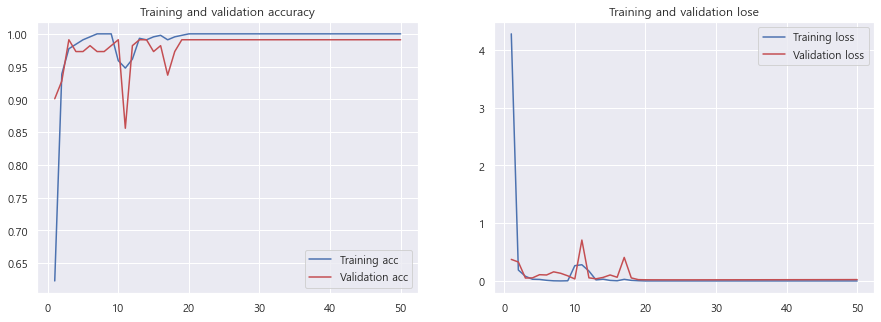

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1)
    
    

fig = plt.figure()
fig.set_size_inches(15, 5)

fig.add_subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label ='Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

# plt.figure()
fig.add_subplot(1, 2, 2) 
plt.plot(epochs, loss, 'b', label = "Training loss")
plt.plot(epochs, val_loss, 'r', label ='Validation loss')
plt.title('Training and validation lose')
plt.legend()

plt.show()

In [36]:
#맥에서는 !ls
#저장된 checkpoint확인하기
!dir {checkpoint_dir}

 C ����̺��� �������� �̸��� �����ϴ�.
 ���� �Ϸ� ��ȣ: 5848-7E5C

 C:\Users\yukir\Documents\Monicas_workspace\Sign detection\VGG\check_point ���͸�

2021-10-01  ���� 01:25    <DIR>          .
2021-10-01  ���� 01:25    <DIR>          ..
2021-10-01  ���� 01:25                71 checkpoint
2021-10-01  ���� 01:25             7,593 cp.ckpt.data-00000-of-00002
2021-10-01  ���� 01:25     1,090,792,776 cp.ckpt.data-00001-of-00002
2021-10-01  ���� 01:25             4,030 cp.ckpt.index
               4�� ����       1,090,804,470 ����Ʈ
               2�� ���͸�  341,428,277,248 ����Ʈ ����


In [20]:
#가장 마지막에 만들어진 체크포인트 확인
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'check_point\\cp.ckpt'

In [21]:
#모델 평가
model = create_model()
loss, acc = model.evaluate(test_generator)
print("훈련 안 한 모델의 정확도: {:5.2f}%".format(100*acc))

12/12 [==============================] - 1s 114ms/step - loss: 1.5929 - acc: 0.1081
훈련 안 한 모델의 정확도: 10.81%


In [23]:
# 가중치 로드
model.load_weights(latest)

# # 모델 재평가
loss,acc = model.evaluate(val_generator)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

7/7 [==============================] - 0s 51ms/step - loss: 0.0233 - acc: 0.9910
복원된 모델의 정확도: 99.10%


In [24]:
# 가중치 로드
model.load_weights(latest)

# # 모델 재평가
loss,acc = model.evaluate(test_generator)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

12/12 [==============================] - 1s 54ms/step - loss: 1.4562 - acc: 0.8541
복원된 모델의 정확도: 85.41%


In [25]:
past_test_dir = 'C:\\Users\\yukir\\Documents\Monicas_workspace\\Datasets\\For past test'
test_datagen = ImageDataGenerator(rescale=1./255)
past_test_generator = test_datagen.flow_from_directory(past_test_dir,batch_size=16, target_size=(200, 200), color_mode='rgb')

# # 모델 재평가
loss,acc = model.evaluate(past_test_generator)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

Found 97 images belonging to 4 classes.
7/7 [==============================] - 1s 135ms/step - loss: 1.2547 - acc: 0.9175
복원된 모델의 정확도: 91.75%


#### final model save

In [ ]:
/pwd

'C:\\Users\\yukir\\Documents\\GitHub\\Sign_Recognition\\py'

In [26]:
model.save('[1001]new_stratified_4class_85.h5')

model_json = model.to_json()
with open("[1001]new_stratified_4class_85.json", "w") as json_file : 
    json_file.write(model_json)

model.save_weights("[1001]new_stratified_4class_85_weight.h5")
print("Saved model to disk")

Saved model to disk


In [27]:
label_dict = get_label_dict(train_generator)
label_dict

{0: 'fragile', 1: 'handle', 2: 'up', 3: 'wet'}

### Test

#### test set

In [37]:
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3])

Confusion Matrix
[[22  6 12 17]
 [ 2  6  6  6]
 [17  8 16 16]
 [21  6 15  9]]
              precision    recall  f1-score   support

     fragile       0.35      0.39      0.37        57
      handle       0.23      0.30      0.26        20
          up       0.33      0.28      0.30        57
         wet       0.19      0.18      0.18        51

    accuracy                           0.29       185
   macro avg       0.27      0.29      0.28       185
weighted avg       0.29      0.29      0.29       185



<Figure size 432x432 with 0 Axes>

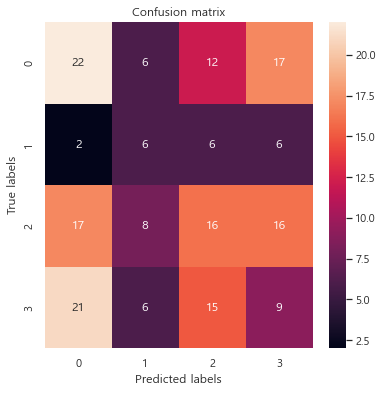

In [38]:
#confusion matrix
from sklearn.metrics import confusion_matrix

# 1.Predict classes
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch)
# print(predictions)
# # Get most likely class axis=1(열로 가장 큰 수의 위치를 보겠다는 소리), 
predicted_classes = np.argmax(predictions, axis=1)

# print(predicted_classes)
# # 2.Get ground-truth classes and class-labels
true_classes = test_generator.classes
# print(true_classes)
class_labels = list(test_generator.class_indices.keys())   
# 3. Use scikit-learn to get statistics
report = classification_report(true_classes, predicted_classes, target_names=class_labels)


print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, predicted_classes))
print(report)

plt.figure(figsize=(6,6))
con_test = confusion_matrix(test_generator.classes, predicted_classes)
confusion_plot(con_test, 6)


#### past test set

Confusion Matrix
[[21  9  4  6]
 [ 7  3  3  2]
 [13  2  5  5]
 [ 7  0  6  4]]
              precision    recall  f1-score   support

     fragile       0.44      0.53      0.48        40
      handle       0.21      0.20      0.21        15
          up       0.28      0.20      0.23        25
         wet       0.24      0.24      0.24        17

    accuracy                           0.34        97
   macro avg       0.29      0.29      0.29        97
weighted avg       0.33      0.34      0.33        97



<Figure size 432x432 with 0 Axes>

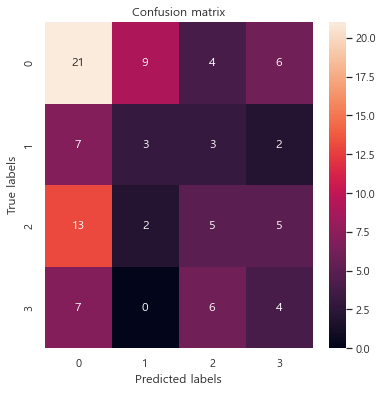

In [32]:
#confusion matrix
from sklearn.metrics import confusion_matrix

# 0. model loading
model = create_model()
model.load_weights(latest)

# 1.Predict classes
test_steps_per_epoch = np.math.ceil(past_test_generator.samples / past_test_generator.batch_size)


predictions = model.predict_generator(past_test_generator, steps=test_steps_per_epoch)
# print(predictions)
# # Get most likely class axis=1(열로 가장 큰 수의 위치를 보겠다는 소리), 
predicted_classes = np.argmax(predictions, axis=1)

# print(predicted_classes)
# # 2.Get ground-truth classes and class-labels
true_classes = past_test_generator.classes
# print(true_classes)
class_labels = list(past_test_generator.class_indices.keys())   
# 3. Use scikit-learn to get statistics
report = classification_report(true_classes, predicted_classes, target_names=class_labels)


print('Confusion Matrix')
print(confusion_matrix(past_test_generator.classes, predicted_classes))
print(report)

plt.figure(figsize=(6,6))
con_test = confusion_matrix(past_test_generator.classes, predicted_classes)
confusion_plot(con_test, 6)